In [45]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
import sys
from collections import OrderedDict
import numpy as np
import pandas as pd

sys.path.append("../")
from utils import FullIndex, ms_table

#s = 'bcdbaecdcd'
s = open('./rep.s').read().strip()#[::-1]
t = open('./rep.t').read().strip()

#s = open('ssss').read().strip()[::-1]
#t = open('tttt').read().strip()

s_index = FullIndex(s)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
dd = pd.DataFrame([_ for _ in s_index.maxrep_iter() if _[3] is False], 
                  columns = ["s_idx", "s", "sa_idx", "maximal"])
dd

,s_idx,s,sa_idx,maximal
0,"(2, 5)",cab,"(12, 15)",False
1,"(2, 6)",cabc,"(13, 15)",False
2,"(3, 5)",ab,"(1, 4)",False
3,"(3, 6)",abc,"(2, 4)",False


In [48]:
#ms_table(t, s)#[50:80]
s_index.tabs[FullIndex.FWD]

,s_i,BWT,SA,suff_SA
i,,,,
0,b,c,20,#
1,c,c,7,abaccabcaccac#
2,c,c,12,abcaccac#
3,a,c,3,abccabaccabcaccac#
4,b,c,18,ac#
5,c,b,9,accabcaccac#
6,c,c,15,accac#
7,a,a,8,baccabcaccac#
8,b,a,13,bcaccac#


# Repeat text with uniform length repeats

[28]


/Users/denas/arch/Darwin_x86_64/lib/python/site-packages/ipykernel/__main__.py:36: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


Counter({1: 2, 8: 2, 11: 1, 12: 1, 14: 1, 17: 1, 20: 1, 27: 1})

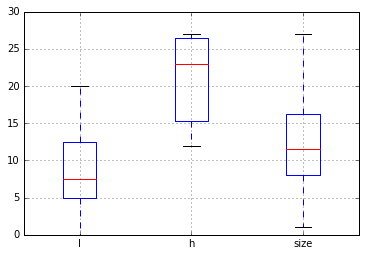

In [20]:
import random
import numpy as np
import pandas as pd


def dump_str(L, seed_pool):
    char_dumped = 0 
    while char_dumped < L:
        seed_str = random.choice(seed_pool)
        n = len(seed_str)

        repeat_length = random.choice(xrange(n))
        repeat_start_position = random.choice(xrange(n - repeat_length))
        assert repeat_length + repeat_start_position <= n
        
        to_write = seed_str[repeat_start_position:(repeat_start_position + repeat_length)]
        char_dumped += len(to_write)
        yield (repeat_start_position, (repeat_start_position + repeat_length))

def _repeat_input_type((t_path, t_len), (s_path, s_len), source,
                       seed_len, seed_nr):
    seed_pool = []
    for seed_idx in range(seed_nr):
        current_seed = "".join([random.choice(source) for i in range(seed_len)])
        seed_pool.append(current_seed)

    with open(t_path, 'w') as fd: 
        dump_str(fd, t_len)
    with open(s_path, 'w') as fd: 
        dump_str(fd, s_len)

seed_pool = ['ababababbababbabababababaaaa']
print map(len, seed_pool)
d = pd.DataFrame(data = list(dump_str(100, seed_pool)), columns = ['l', 'h'])
d['size'] = (d.h - d.l)
d.boxplot()

from collections import Counter
Counter(d['size'].tolist())

In [16]:

random.choice(6)

TypeError: object of type 'int' has no len()